## Model Training

#### 1.1 Import Data and Required Packages
##### Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [35]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

#### Import the CSV Data as Pandas DataFrame

In [36]:
df = pd.read_csv('data/stud.csv')

#### Show Top 5 Records

In [37]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### Preparing X and Y variables

In [38]:
X = df.drop(columns=['math_score'],axis=1)

In [39]:
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [40]:
# Displaying the unique categories present in each categorical column of our dataset
categorical_columns = ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']

for column in categorical_columns:
    unique_values = df[column].unique()  # Extracting unique values for each category
    print(f"Unique categories in '{column.replace('_', ' ')}': {unique_values}")

Unique categories in 'gender': ['female' 'male']
Unique categories in 'race ethnicity': ['group B' 'group C' 'group A' 'group D' 'group E']
Unique categories in 'parental level of education': ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Unique categories in 'lunch': ['standard' 'free/reduced']
Unique categories in 'test preparation course': ['none' 'completed']


In [41]:
y = df['math_score']

In [42]:
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math_score, Length: 1000, dtype: int64

In [43]:
# Construct a processing object with three distinct transformers
numeric_attributes = X.select_dtypes(exclude=["object"]).columns
categorical_attributes = X.select_dtypes(include=["object"]).columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

# Define transformations for numerical and categorical data
scaler_for_numerical = StandardScaler()
encoder_for_categorical = OneHotEncoder()

# Initialize ColumnTransformer with appropriate transformations
data_transforms = ColumnTransformer(
    [
        ("CategoricalEncoder", encoder_for_categorical, categorical_attributes),
        ("NumericalScaler", scaler_for_numerical, numeric_attributes),        
    ]
)


In [44]:
# Use the correct variable name for fitting and transforming
X_transformed = data_transforms.fit_transform(X)

In [45]:
X.shape

(1000, 7)

In [46]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((800, 7), (200, 7))

#### Create an Evaluate Function to give all metrics after model Training

In [47]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [48]:
# Define a dictionary to hold different regression models
regression_models = {
    "Ordinary Least Squares": LinearRegression(),
    "Lasso Regression": Lasso(),
    "Ridge Regression": Ridge(),
    "KNN Regressor": KNeighborsRegressor(),
    "Tree Regressor": DecisionTreeRegressor(),
    "Forest Regressor": RandomForestRegressor(),
    "Extreme Gradient Boosting": XGBRegressor(),
    "CatBoost Regressor": CatBoostRegressor(verbose=False),
    "Adaptive Boosting Regressor": AdaBoostRegressor()
}

# Assuming data_transforms is your ColumnTransformer
X_train_transformed = data_transforms.fit_transform(X_train)
X_test_transformed = data_transforms.transform(X_test)

# Lists to store model names and their respective R2 scores for comparison
model_names = []
test_r2_scores = []

# Iterate through the dictionary and perform actions for each model
for model_name, model_instance in regression_models.items():
    model_instance.fit(X_train_transformed, y_train)  # Fit model on transformed training data

    # Predict using the trained model
    predictions_on_train = model_instance.predict(X_train_transformed)
    predictions_on_test = model_instance.predict(X_test_transformed)
    
    # Evaluate the model's performance
    train_mae, train_rmse, train_r2 = evaluate_model(y_train, predictions_on_train)
    test_mae, test_rmse, test_r2 = evaluate_model(y_test, predictions_on_test)

    # Log and display model performance
    print(f"{model_name}:")
    print('Training Set Performance - RMSE: {:.4f}, MAE: {:.4f}, R^2: {:.4f}'.format(train_rmse, train_mae, train_r2))
    print('Test Set Performance - RMSE: {:.4f}, MAE: {:.4f}, R^2: {:.4f}\n'.format(test_rmse, test_mae, test_r2))
    model_names.append(model_name)
    test_r2_scores.append(test_r2)


Ordinary Least Squares:
Training Set Performance - RMSE: 5.3231, MAE: 4.2667, R^2: 0.8743
Test Set Performance - RMSE: 5.3940, MAE: 4.2148, R^2: 0.8804

Lasso Regression:
Training Set Performance - RMSE: 6.5925, MAE: 5.2053, R^2: 0.8072
Test Set Performance - RMSE: 6.5173, MAE: 5.1557, R^2: 0.8254

Ridge Regression:
Training Set Performance - RMSE: 5.3233, MAE: 4.2650, R^2: 0.8743
Test Set Performance - RMSE: 5.3904, MAE: 4.2111, R^2: 0.8806

KNN Regressor:
Training Set Performance - RMSE: 5.6998, MAE: 4.5083, R^2: 0.8559
Test Set Performance - RMSE: 7.2140, MAE: 5.5750, R^2: 0.7861

Tree Regressor:
Training Set Performance - RMSE: 0.2795, MAE: 0.0187, R^2: 0.9997
Test Set Performance - RMSE: 7.9193, MAE: 6.3550, R^2: 0.7423



Forest Regressor:
Training Set Performance - RMSE: 2.2920, MAE: 1.8212, R^2: 0.9767
Test Set Performance - RMSE: 5.9928, MAE: 4.6499, R^2: 0.8524

Extreme Gradient Boosting:
Training Set Performance - RMSE: 1.0073, MAE: 0.6875, R^2: 0.9955
Test Set Performance - RMSE: 6.4733, MAE: 5.0577, R^2: 0.8278

CatBoost Regressor:
Training Set Performance - RMSE: 3.0427, MAE: 2.4054, R^2: 0.9589
Test Set Performance - RMSE: 6.0046, MAE: 4.6088, R^2: 0.8518

Adaptive Boosting Regressor:
Training Set Performance - RMSE: 5.8989, MAE: 4.8201, R^2: 0.8457
Test Set Performance - RMSE: 6.1564, MAE: 4.7457, R^2: 0.8442



### Results

In [49]:
import pandas as pd

# Assuming 'model_names' and 'test_r2_scores' are the lists containing your data:
df = pd.DataFrame(list(zip(model_names, test_r2_scores)), columns=['Model Name', 'R2 Score'])
sorted_df = df.sort_values(by="R2 Score", ascending=False)
print(sorted_df)


                    Model Name  R2 Score
2             Ridge Regression  0.880592
0       Ordinary Least Squares  0.880433
5             Forest Regressor  0.852413
7           CatBoost Regressor  0.851831
8  Adaptive Boosting Regressor  0.844243
6    Extreme Gradient Boosting  0.827797
1             Lasso Regression  0.825446
3                KNN Regressor  0.786134
4               Tree Regressor  0.742272


## Linear Regression

In [51]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

rf = RandomForestRegressor(random_state=42)

# Hyperparameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
}

# Grid search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, scoring='r2')
grid_search.fit(X_train_transformed, y_train)

# Best model
best_rf = grid_search.best_estimator_

# Make predictions and evaluate
y_pred = best_rf.predict(X_test_transformed)
score = r2_score(y_test, y_pred) * 100
print("Improved accuracy of the model is %.2f%%" % score)

Improved accuracy of the model is 85.49%


## Plot y_pred and y_test

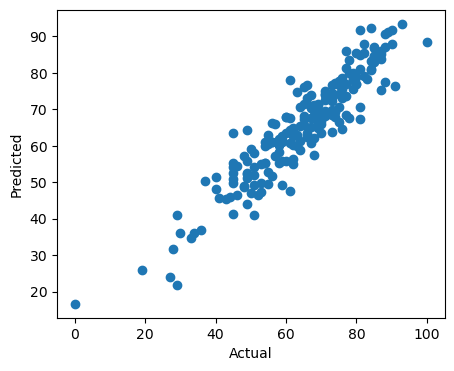

In [59]:
plt.figure(figsize=(5, 4));
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

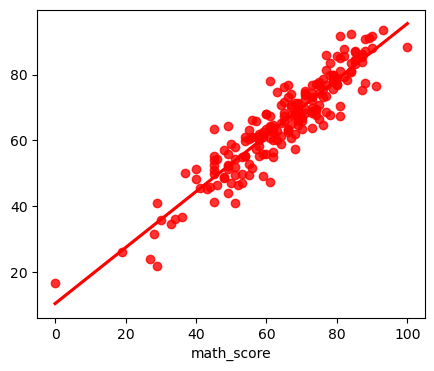

In [62]:
plt.figure(figsize=(5, 4));
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

#### Difference between Actual and Predicted Values

In [54]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,91,76.508764,14.491236
737,53,55.101447,-2.101447
740,80,76.870933,3.129067
660,74,77.197050,-3.197050
411,84,81.092706,2.907294
...,...,...,...
408,52,46.388976,5.611024
332,62,60.177190,1.822810
208,74,67.764956,6.235044
613,65,68.234426,-3.234426
